In [1]:
import ai2thor
from ai2thor.controller import Controller,BFSController
from ai2thor.platform import CloudRendering
from ithor_tools.vis_tool import *
from ithor_tools.transform import cornerpoint_projection
from ithor_tools.map import single_scenemap
from ithor_tools.astar import astar
import random
import math
from IPython.display import display
from moviepy.editor import ImageSequenceClip,VideoFileClip
from matplotlib import transforms


"AI2-THOR Version: " + ai2thor.__version__

'AI2-THOR Version: 4.2.0'

In [2]:
gridSize=0.05

controller = Controller(
    # platform = CloudRendering,
    agentMode="locobot",
    visibilityDistance=1.5,
    scene="FloorPlan_Train1_3",
    gridSize=gridSize,
    movementGaussianSigma=0,
    rotateStepDegrees=90,
    rotateGaussianSigma=0,
    renderDepthImage=False,
    renderInstanceSegmentation=False,
    width=500,
    height=500,
    fieldOfView=60
)

In [3]:
controller.reset(
    # makes the images a bit higher quality
    width=400,
    height=400,

    # Renders several new image modalities
    renderDepthImage=True,
    renderInstanceSegmentation=False,
    renderSemanticSegmentation=False,
    renderNormalsImage=False
)


<ai2thor.server.Event at 0x7f1c081a7940
    .metadata["lastAction"] = Initialize
    .metadata["lastActionSuccess"] = True
    .metadata["errorMessage"] = "
    .metadata["actionReturn"] = {'cameraNearPlane': 0.10000000149011612, 'cameraFarPlane': 20.0}
>

In [4]:
scene_bounds = controller.last_event.metadata['sceneBounds']['center']
controller.step(
    action="AddThirdPartyCamera",
    position=dict(x=scene_bounds['x'], y=5, z=scene_bounds['z']),
    rotation=dict(x=90, y=0, z=0),
    orthographic=True,
    orthographicSize=5, # size of output image
    skyboxColor="white",
    fieldOfView = 90
)


<ai2thor.server.Event at 0x7f1bf8edb760
    .metadata["lastAction"] = AddThirdPartyCamera
    .metadata["lastActionSuccess"] = True
    .metadata["errorMessage"] = "
    .metadata["actionReturn"] = None
>

In [5]:
controller.step(dict(action='GetReachablePositions'))
rstate = controller.last_event.metadata['actionReturn']

initstate = 20
goalstate = 4000

controller.step(
    action="Teleport",
    position = rstate[initstate]
)


<ai2thor.server.Event at 0x7f1bd2895e80
    .metadata["lastAction"] = Teleport
    .metadata["lastActionSuccess"] = True
    .metadata["errorMessage"] = "
    .metadata["actionReturn"] = None
>

## GridMap RRT

In [6]:
from RRT import gridmaprrt as rrt

In [7]:
rrtplanner = rrt.RRT(controller = controller, expand_dis=0.1,max_iter=10000,goal_sample_rate=20)
rrtplanner.set_start(rstate[initstate])
rrtplanner.set_goal(rstate[goalstate])

In [8]:
%matplotlib tk
path = rrtplanner.planning(animation=False) # Uncomment "%matplotlib tk" when you want to animate

path found!


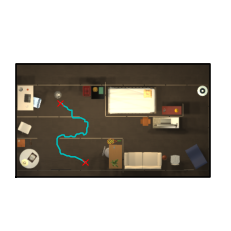

In [9]:
%matplotlib inline
rrtplanner.plot_path(path)

In [10]:
%matplotlib tk
from RRT import gridmaprrt_pathsmoothing as smoothing
smoothpath = smoothing.path_smoothing(rrtplanner,40,verbose=False)

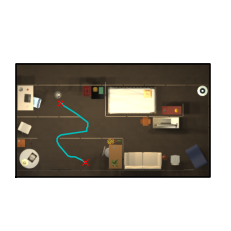

In [11]:
%matplotlib inline
rrtplanner.plot_path(smoothpath)

In [12]:
flag = rrtplanner.get_Navigation_success_flag(path,verbose=True)

Navigation Successful!
